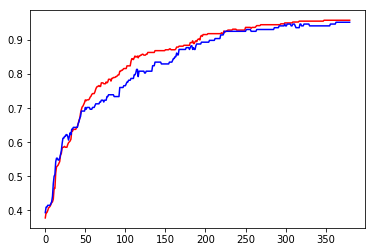

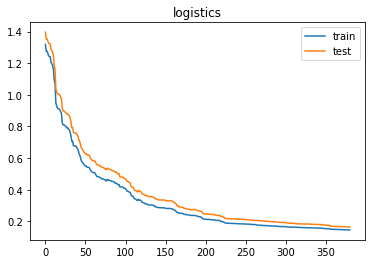

X_train final cross_entropy 0.14648956490662302
X_test final cross_entropy 0.1649307343483145


In [71]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import math
def preprocess(X_source,X_input):
    params = np.shape(X_input)
    mean = np.mean(X_source,axis=0)
    std = np.std(X_source,axis=0)
    for i in range(params[0]):
        for j in range(params[1]):
            X_input[i][j] = (X_input[i][j]-mean[j])/std[j]
    X_input = np.insert(X_input,0,1,axis = 1)
    [data_num,feature_num]=np.shape(X_input)
    X_input =X_input.reshape(data_num,feature_num)
    return X_input

def sigmoid(a):
    return np.exp(a)/(1+np.exp(a))

X, y = load_breast_cancer().data, load_breast_cancer().target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_test = preprocess(X_train,X_test)
X_train = preprocess(X_train,X_train)



w = np.random.uniform(-1,1,np.shape(X_train)[1]).reshape(np.shape(X_train)[1],1)
E_ave_train =[]

E_ave_test =[]
rate = 1e-2
order = np.arange(np.shape(X_train)[0])
np.random.shuffle(order)
acc = []
acc_test=[]
for i in order:
    x = X_train[i]
    y = y_train[i]
    diff = sigmoid(x@w) - y
    w = w - rate*(diff*x.reshape(31,1))  
    classif = X_train@w
    classif_test = X_test@w
    E_train= 0
    E_test= 0
    for i in np.arange(np.shape(X_train)[0]):
        E_train  += -(y_train[i]*math.log(sigmoid(X_train[i]@w))+(1-y_train[i])*math.log(1-sigmoid(X_train[i]@w)))               
    E_ave_train.append(E_train/np.shape(X_train)[0])
    for i in np.arange(np.shape(X_test)[0]):
        E_test  += -(y_test[i]*math.log(sigmoid(X_test[i]@w))+(1-y_test[i])*math.log(1-sigmoid(X_test[i]@w)))               
    E_ave_test.append(E_test/np.shape(X_test)[0])
    correct = 0
    correct1 = 0
    predict_train =[]
    for i in np.arange(np.shape(X_train)[0]):
        if classif[i]>=0:
            predict_train.append(1)
        else:
            predict_train.append(0)
    for i in np.arange(np.shape(X_train)[0]):
        if predict_train[i] == y_train[i]:
            correct +=1
        else:
            continue
    train_accuracy = correct / np.shape(X_train)[0]
    acc.append(train_accuracy)
    
    predict_test = []
    for i in np.arange(np.shape(X_test)[0]):
        if classif_test[i]>=0:
            predict_test.append(1)
        else:
            predict_test.append(0)
    for i in np.arange(np.shape(X_test)[0]):
        if predict_test[i] == y_test[i]:
            correct1 +=1
        else:
            continue
   
    test_accuracy = correct1 / np.shape(X_test)[0]
    acc_test.append(test_accuracy)
plt.plot(np.arange(np.shape(X_train)[0]),acc,'r')
plt.plot(np.arange(np.shape(X_train)[0]),acc_test,'b')
plt.figure()
plt.plot(np.arange(np.shape(X_train)[0]),E_ave_train)
plt.plot(np.arange(np.shape(X_train)[0]),E_ave_test)
plt.legend(['train','test'])
plt.title('logistics')
plt.savefig('logistics.png')
plt.show()



E_train_final = 0
for i in np.arange(np.shape(X_train)[0]):
    E_train_final  += -(y_train[i]*math.log(sigmoid(X_train[i]@w))+(1-y_train[i])*math.log(1-sigmoid(X_train[i]@w)))
    
E_test_final = 0
for i in np.arange(np.shape(X_test)[0]):
    E_test_final  += -(y_test[i]*math.log(sigmoid(X_test[i]@w))+(1-y_test[i])*math.log(1-sigmoid(X_test[i]@w))) 
print('X_train final cross_entropy',E_train_final/np.shape(X_train)[0])
print('X_test final cross_entropy',E_test_final/np.shape(X_test)[0])